## HT3 - Proyecto 2. Entrega 1
### Modelos de Regresión Lineal
Diego Duarte 22075 - José Marchena 22398

#### Analisis Exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import funciones

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

In [3]:
print(house_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
cuantitiativas = house_prices.select_dtypes(include=['int64', 'float64']).columns.tolist()
cualitativas = house_prices.select_dtypes(include=['object']).columns.tolist()

print(cuantitiativas)
print(cualitativas)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gara

In [5]:
# Utilizados para conocer si las variables pueden representar un valor cualitativo
print(house_prices['MSSubClass'].unique())
print(house_prices['OverallQual'].unique())
print(house_prices['LowQualFinSF'].unique())
print(house_prices['BsmtFullBath'].unique())
print(house_prices['BsmtHalfBath'].unique())
print(house_prices['KitchenAbvGr'].unique())
print(house_prices['MoSold'].unique())

cuantitiativas.remove('MSSubClass')
cuantitiativas.remove('MoSold')
cualitativas.append('MSSubClass')
cualitativas.append('MoSold')

#El Id no nos sirve en el analisis
cuantitiativas.remove('Id')

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
[ 7  6  8  5  9  4 10  3  1  2]
[  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384]
[1 0 2 3]
[0 1 2]
[1 2 3 0]
[ 2  5  9 12 10  8 11  4  1  7  3  6]


In [ ]:
#En base a un analisis general se decidio mover estas variables a las cuantitativas para hacer una tabla de frecuencia. 
variables_a_mover = [
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
    'GarageCars', 'KitchenAbvGr', 'YrSold'
]

for var in variables_a_mover:
    if var in cuantitiativas:
        cuantitiativas.remove(var)
        cualitativas.append(var)


for col in cuantitiativas:
    print("***" + col + "***")
    funciones.prueba_de_normalidad(house_prices[col],col)
    print("\n")

NameError: name 'cuantitativas' is not defined

***MSZoning***


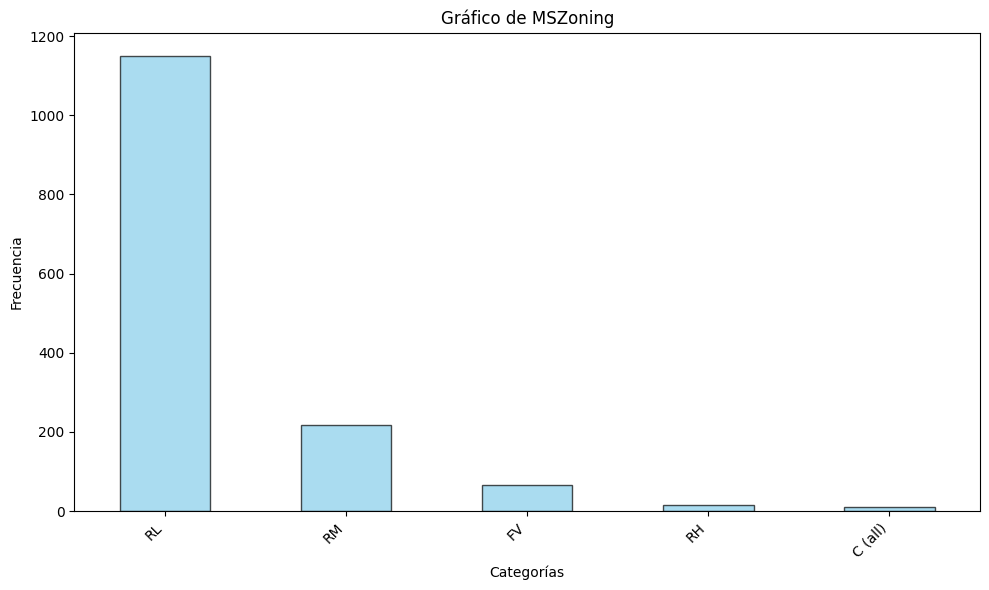



***Street***


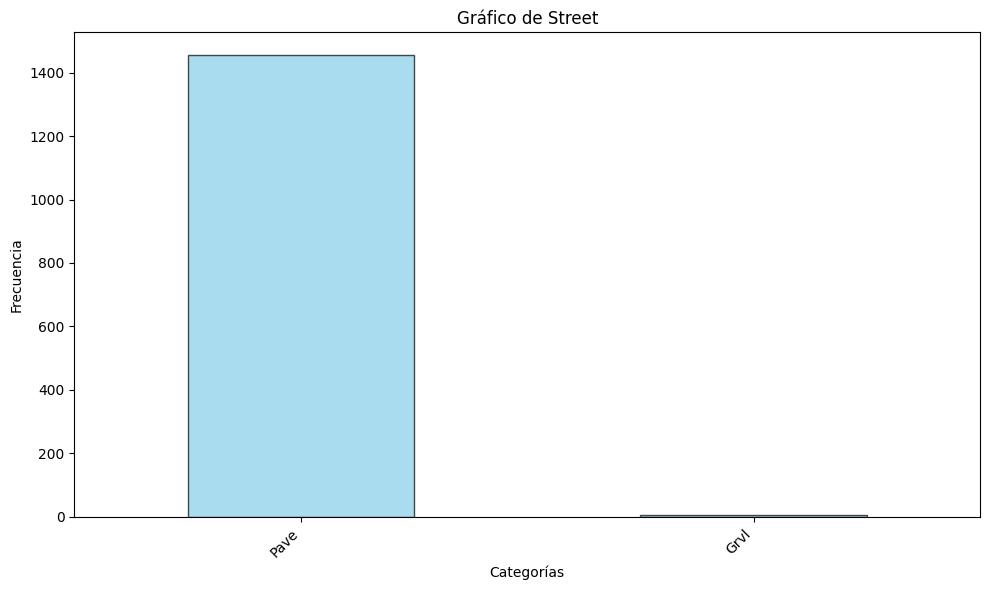



***Alley***


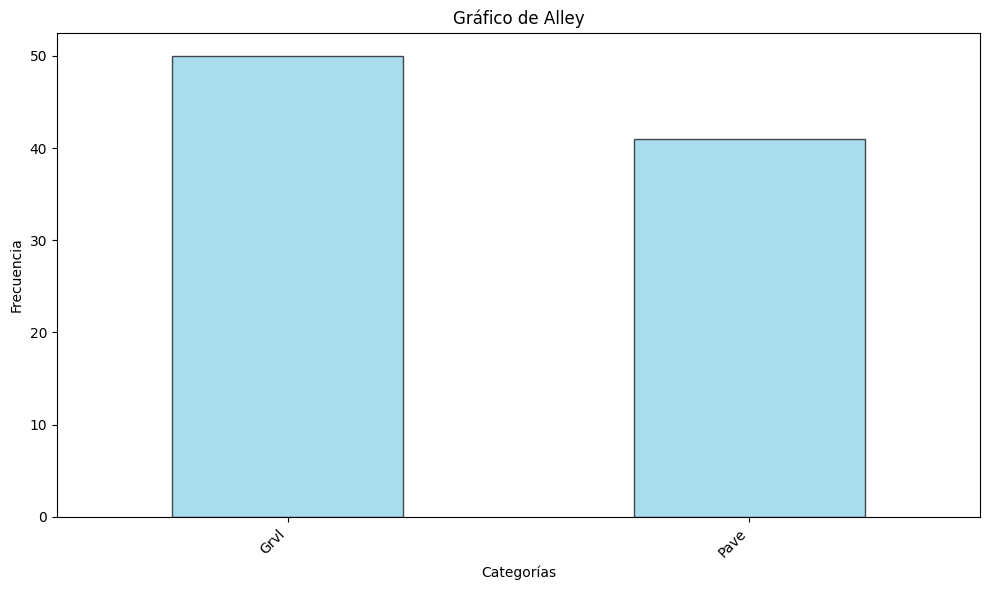



***LotShape***


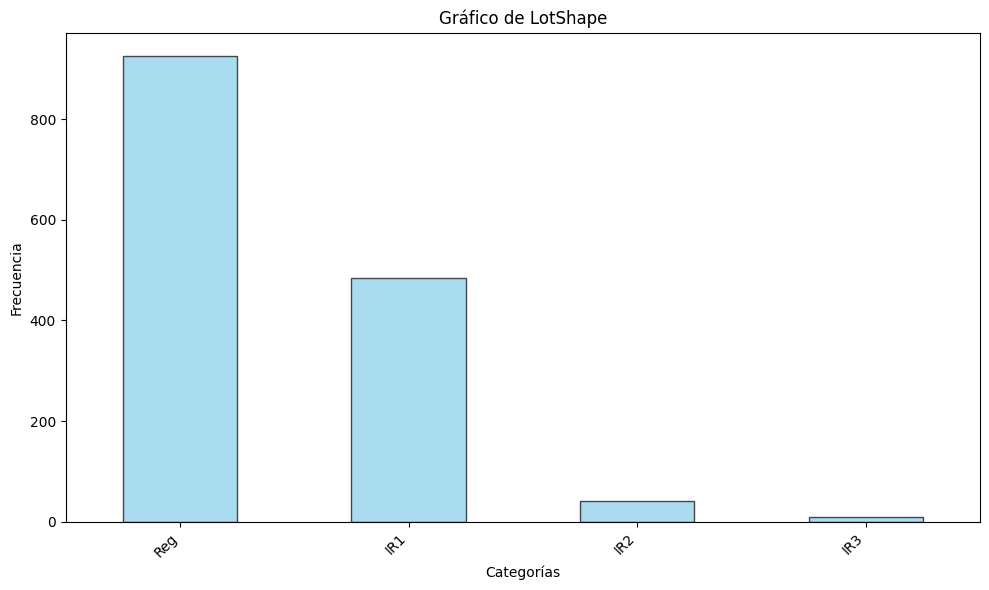



***LandContour***


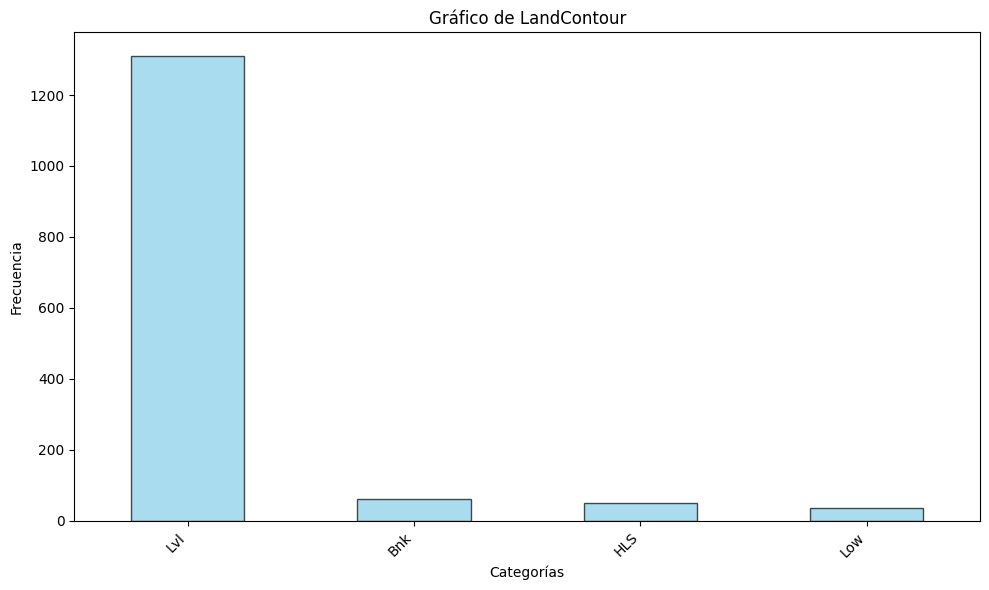



***Utilities***


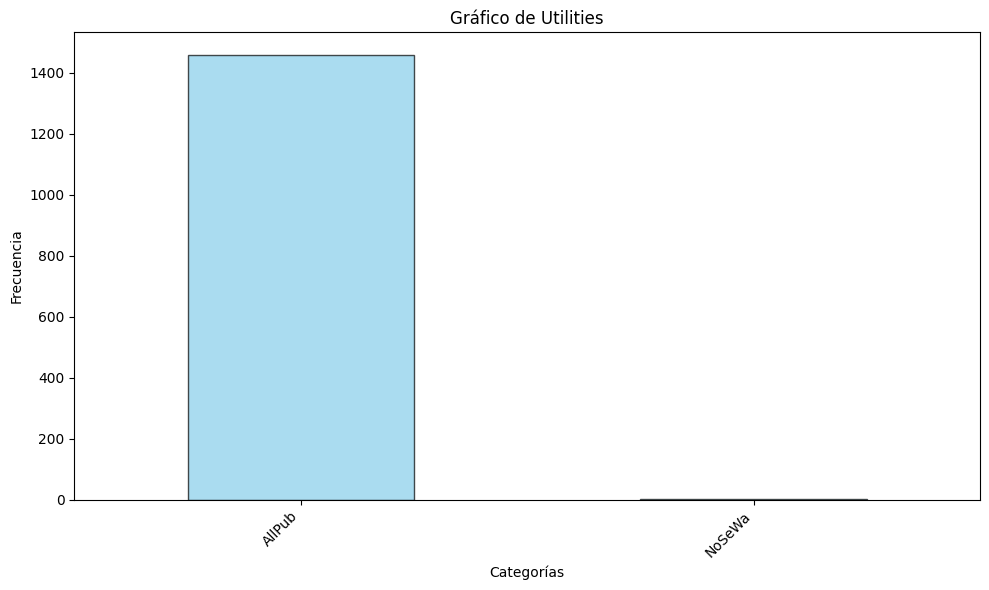



***LotConfig***


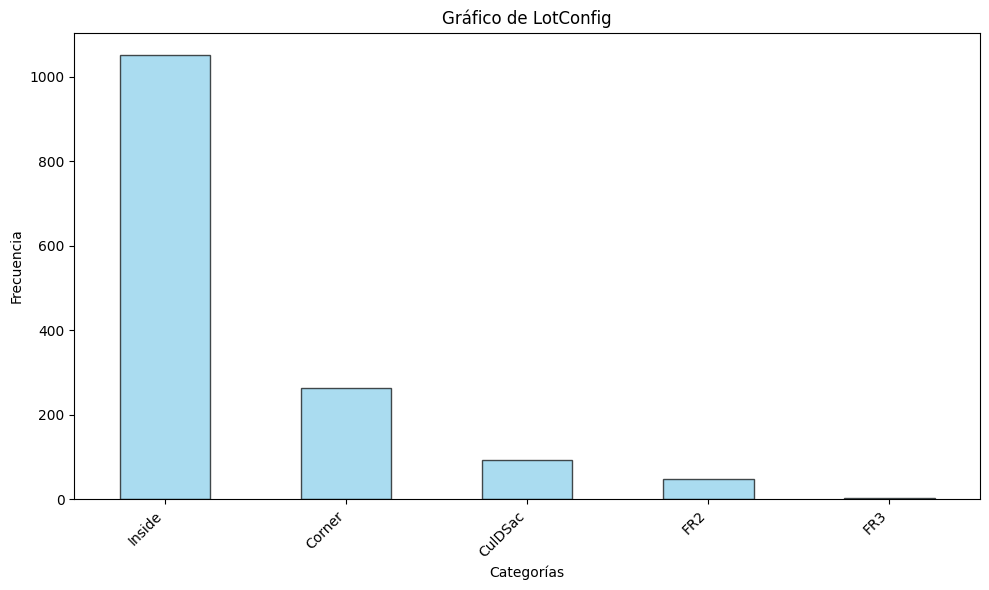



***LandSlope***


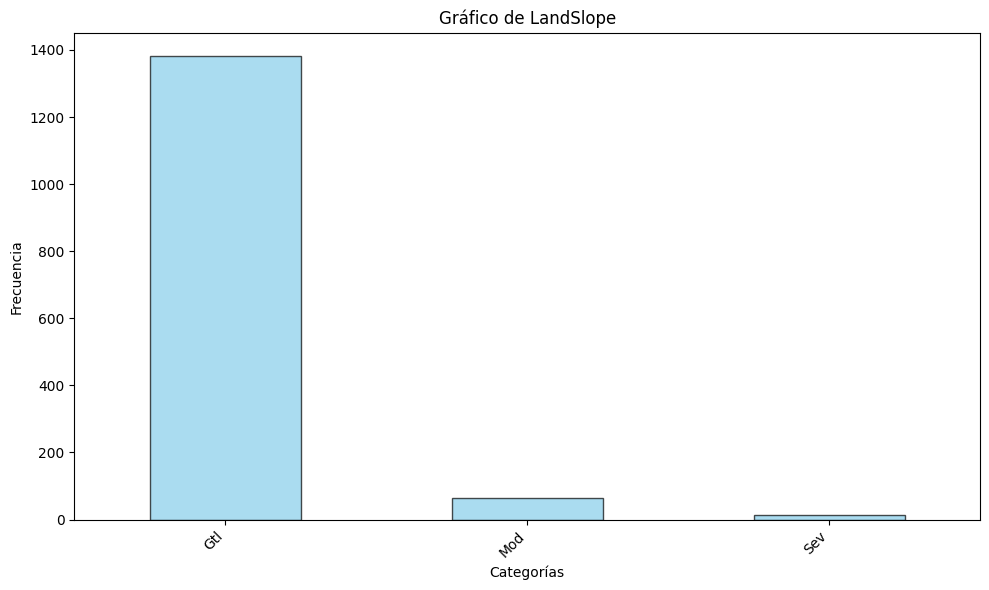



***Neighborhood***


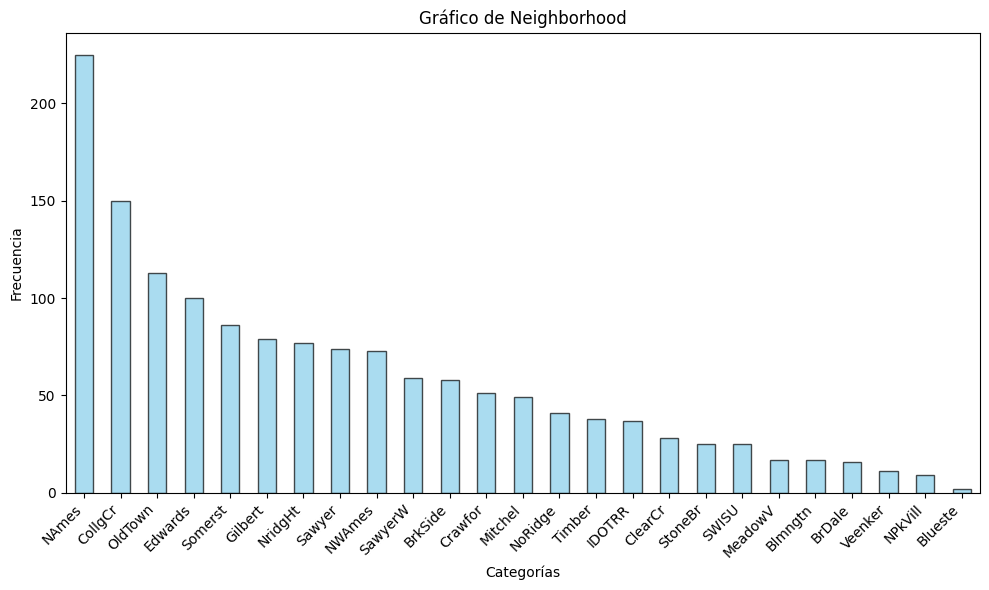



***Condition1***


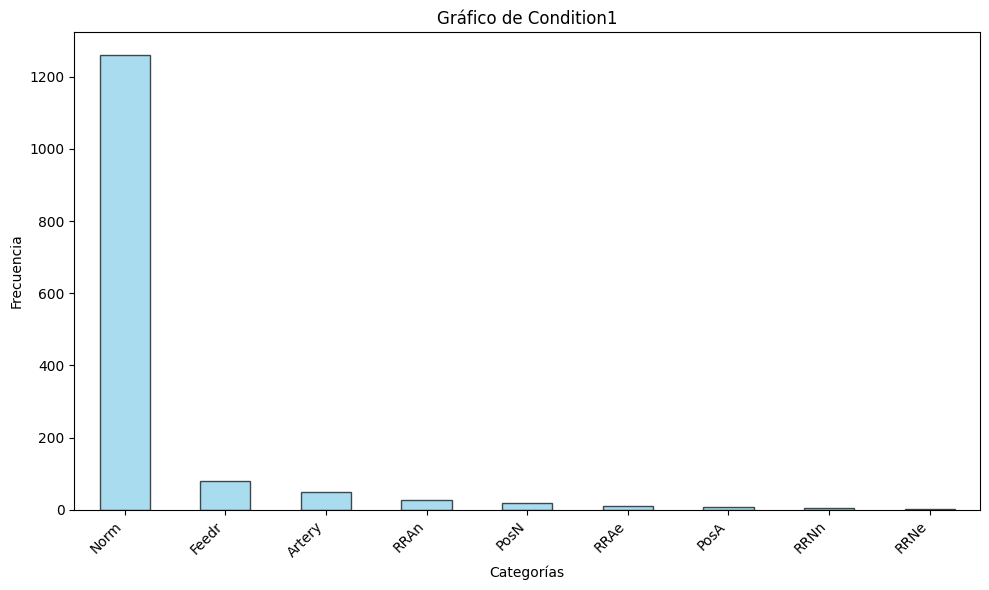



***Condition2***


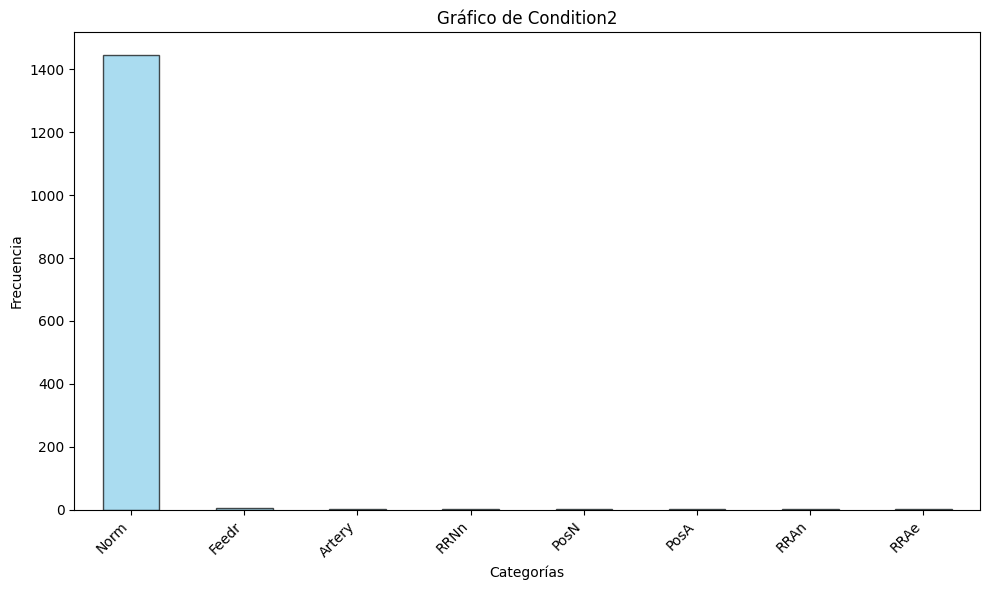



***BldgType***


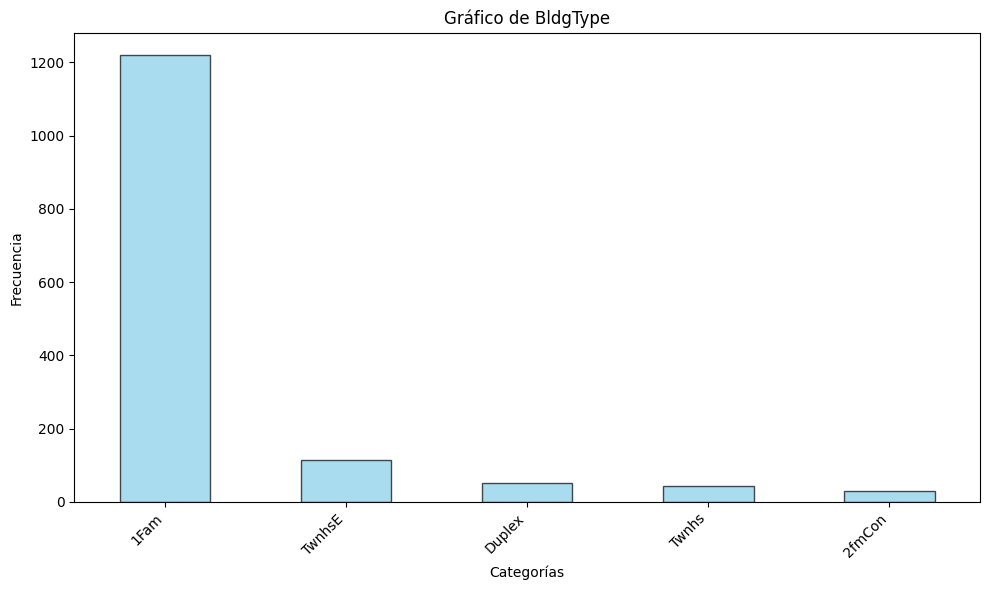



***HouseStyle***


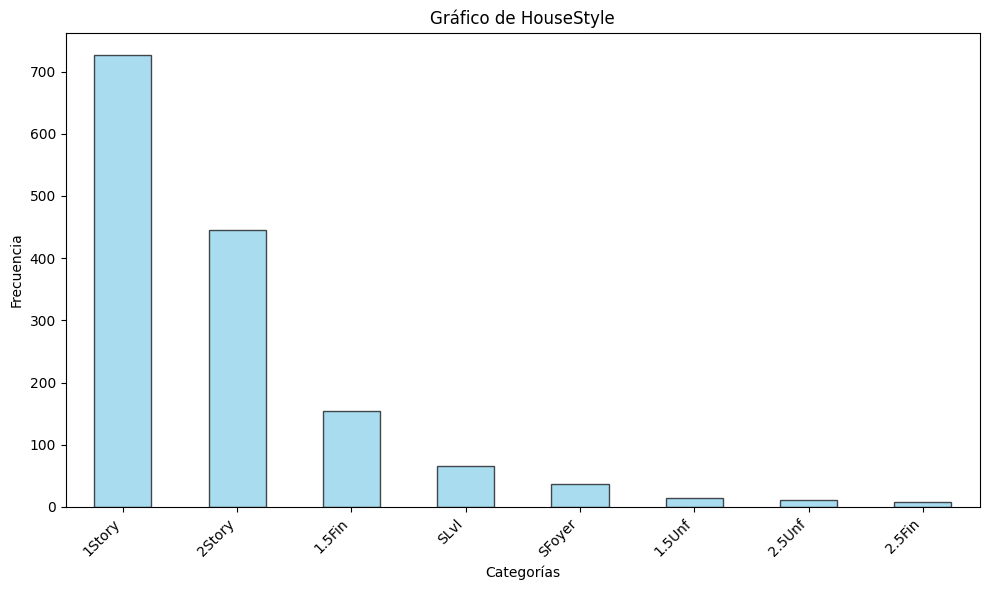



***RoofStyle***


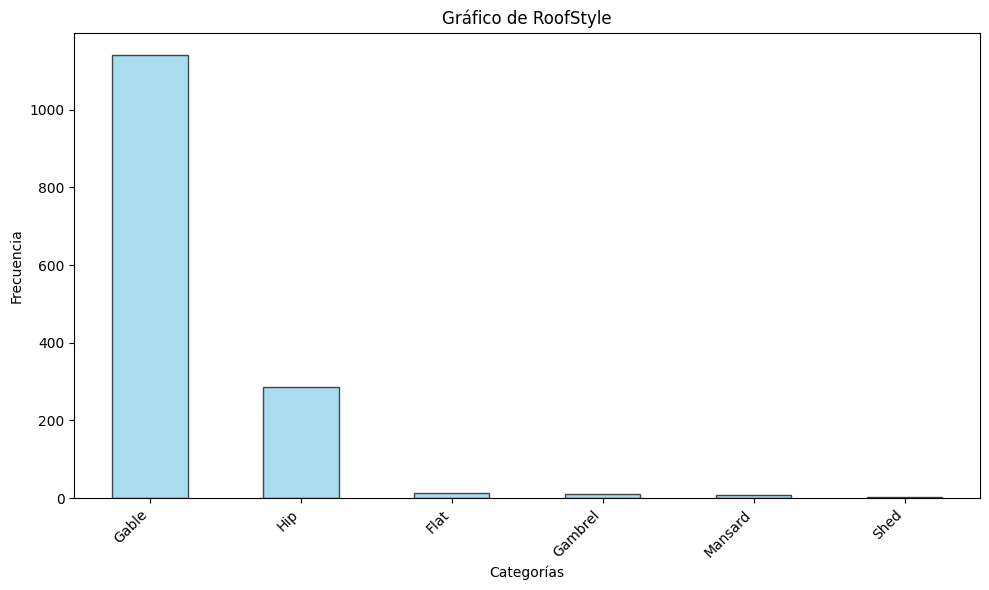



***RoofMatl***


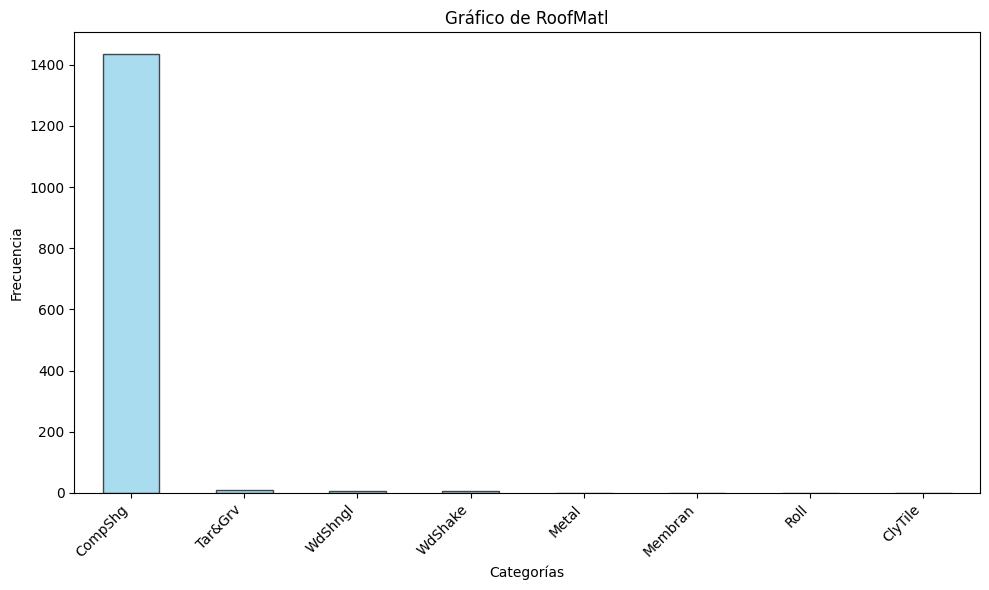



***Exterior1st***


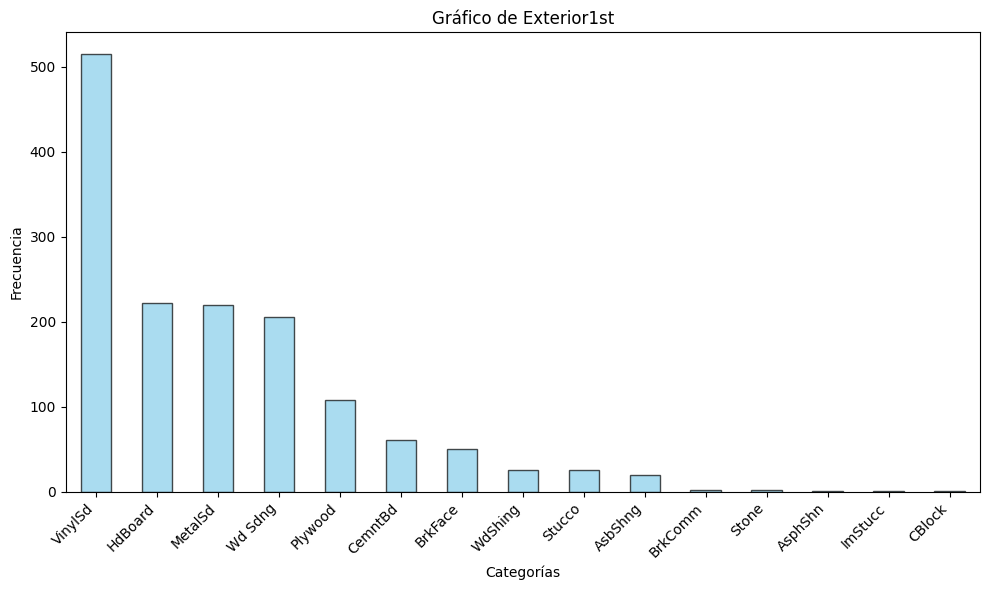



***Exterior2nd***


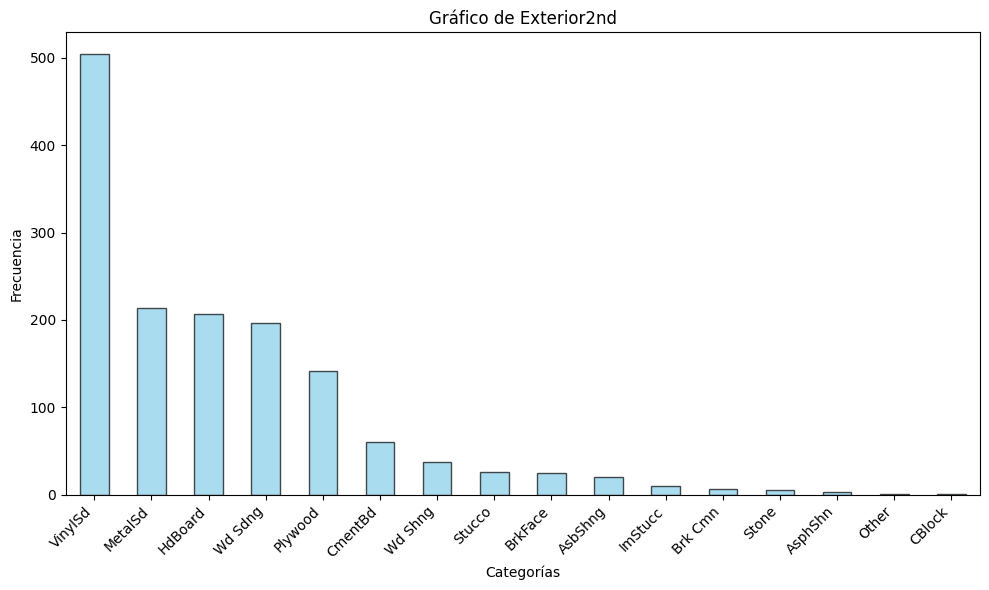



***MasVnrType***


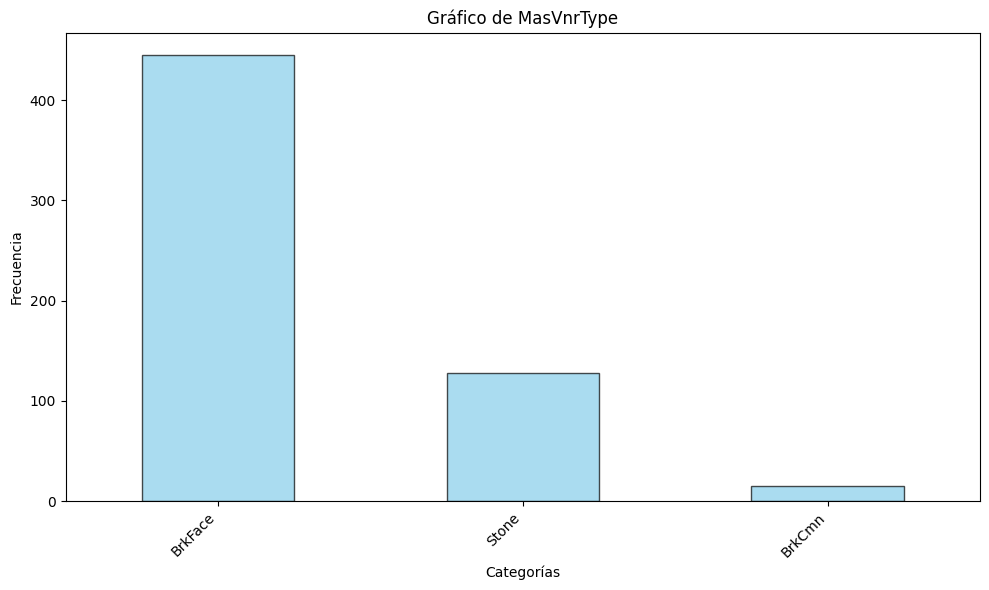



***ExterQual***


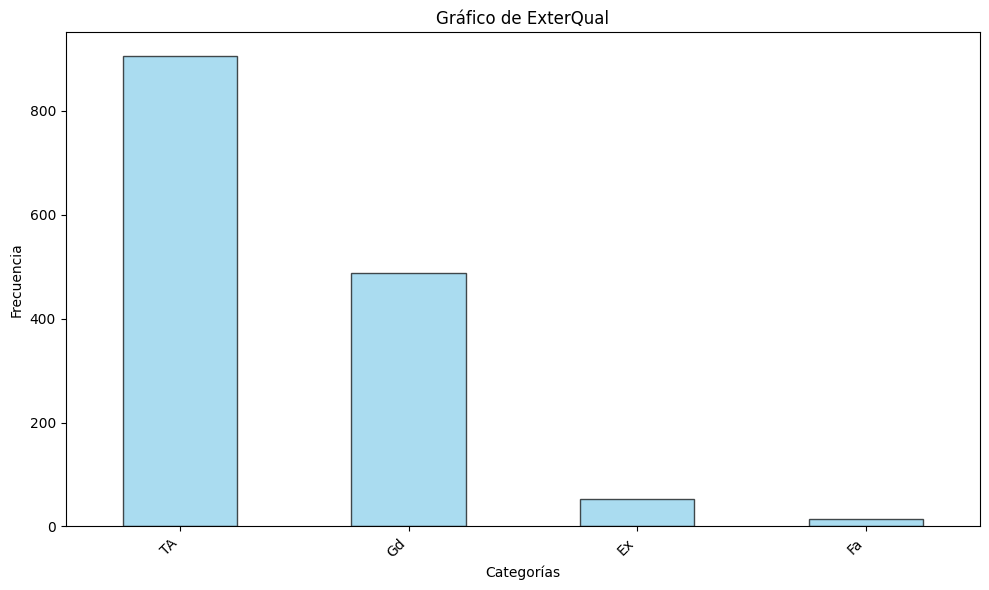



***ExterCond***


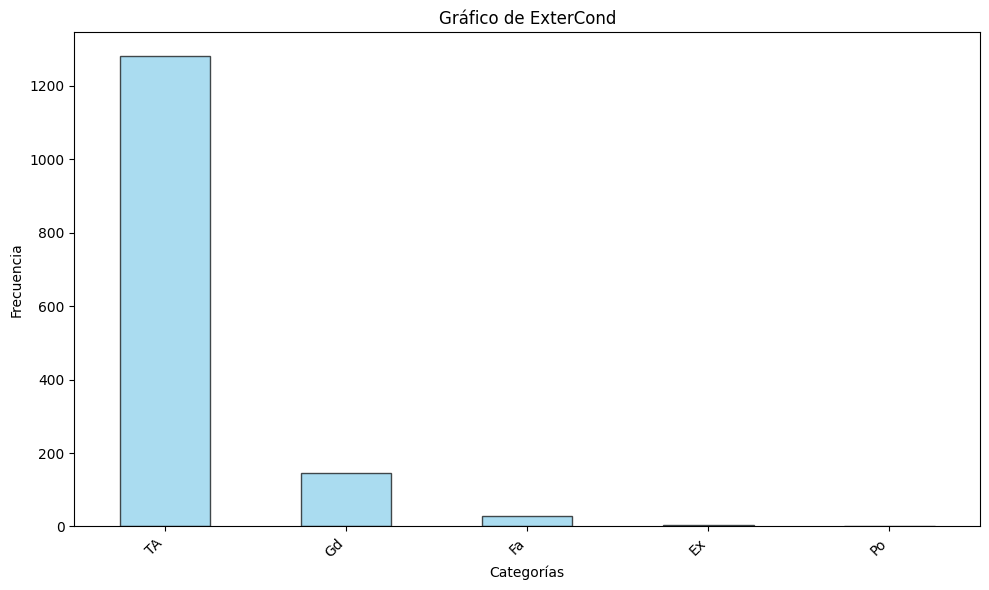



***Foundation***


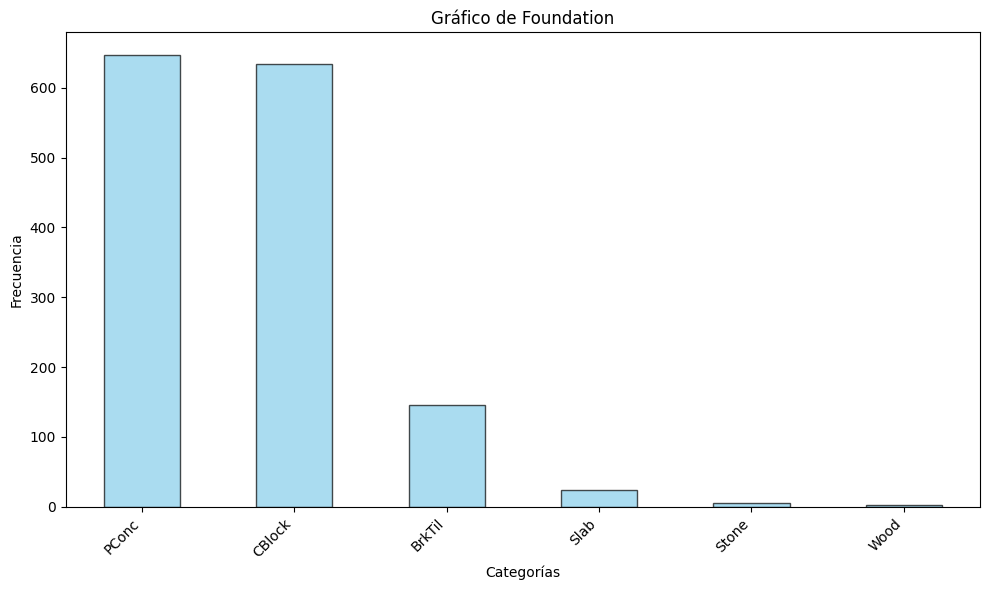



***BsmtQual***


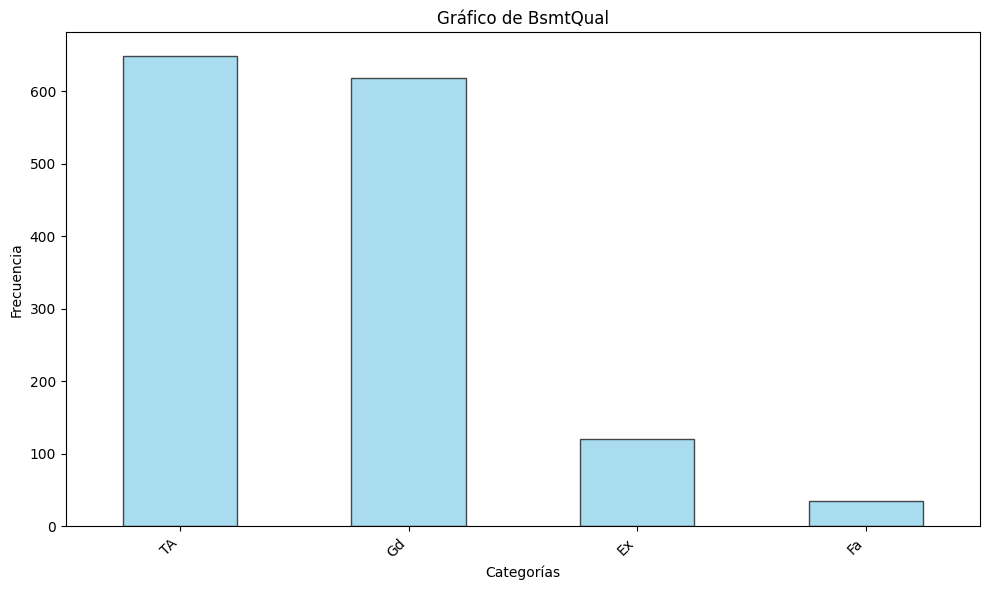



***BsmtCond***


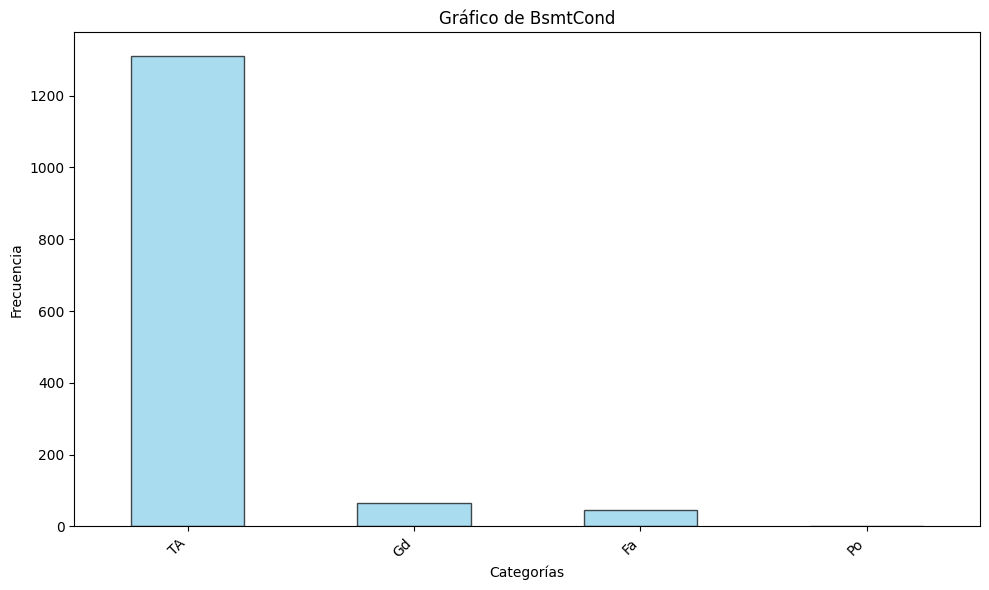



***BsmtExposure***


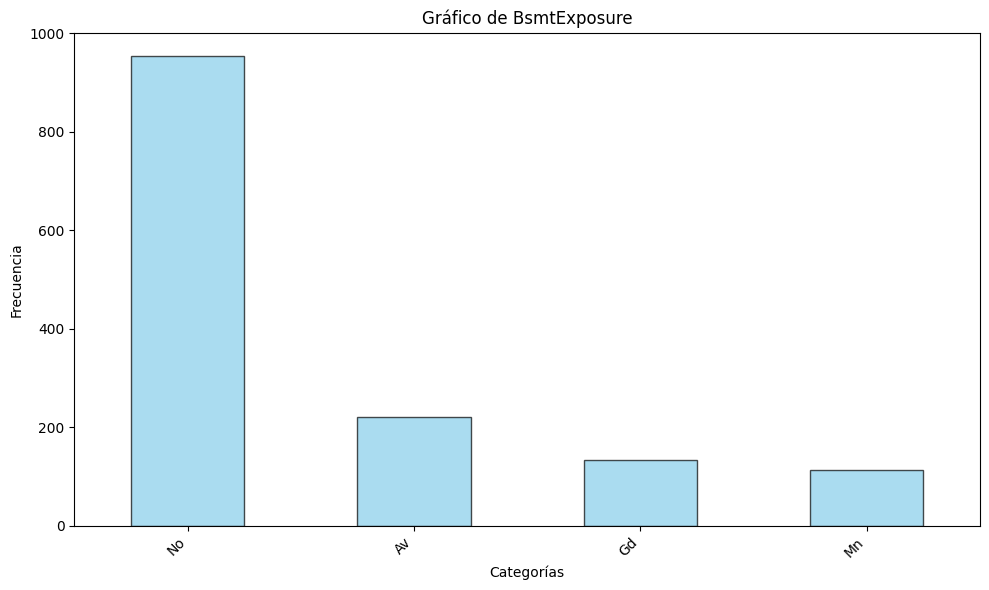



***BsmtFinType1***


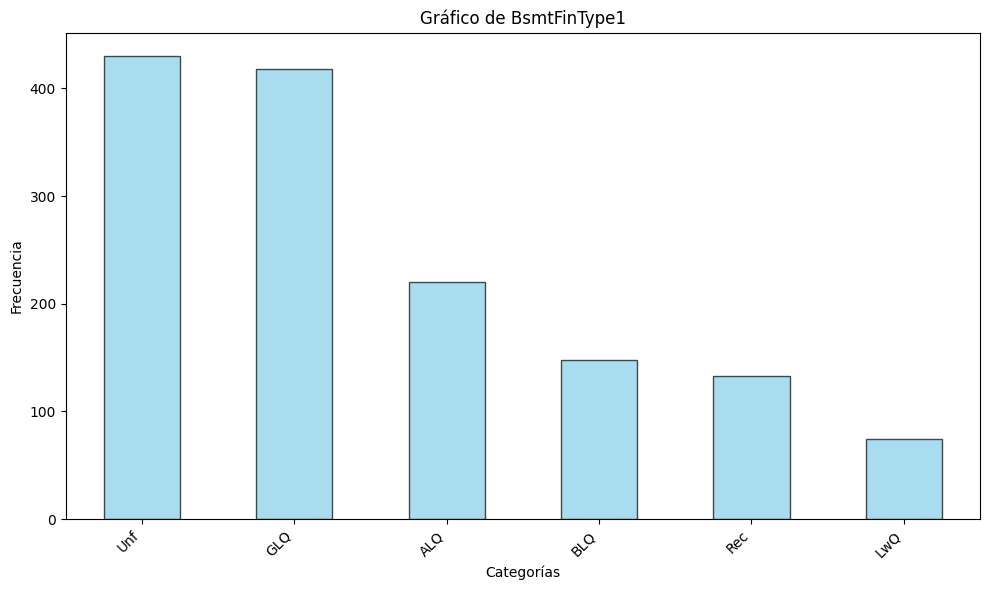



***BsmtFinType2***


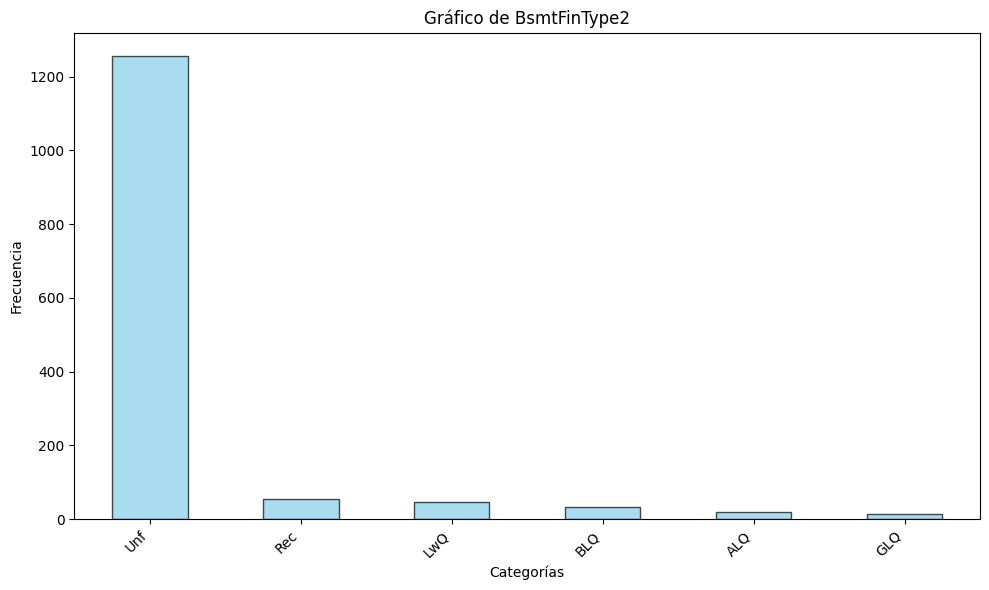



***Heating***


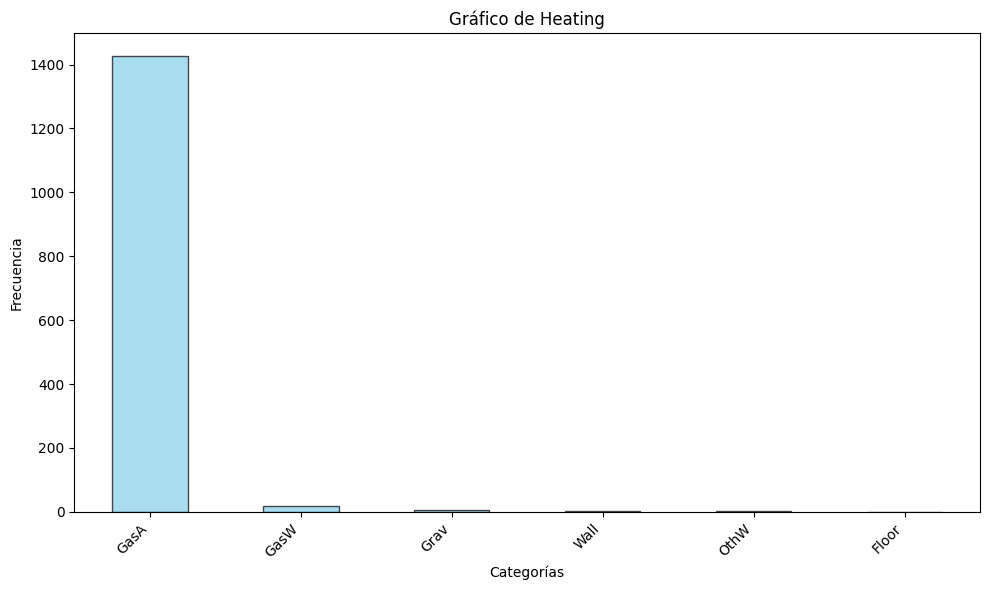



***HeatingQC***


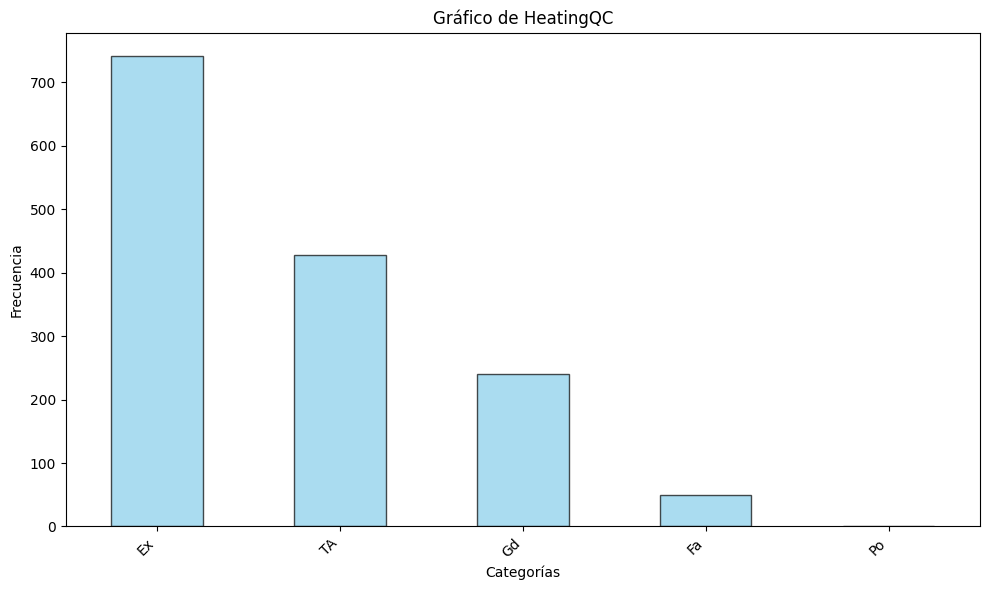



***CentralAir***


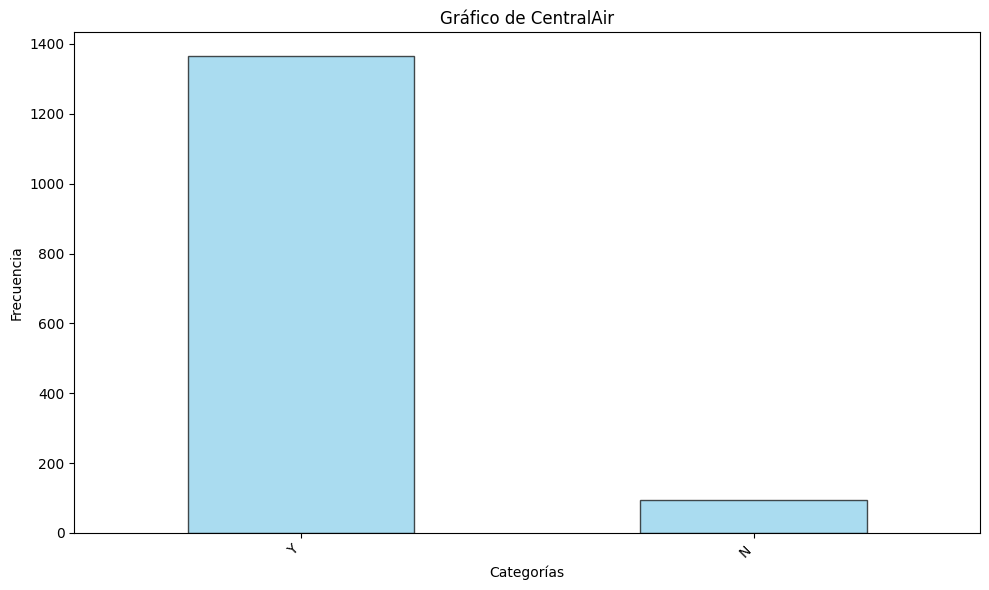



***Electrical***


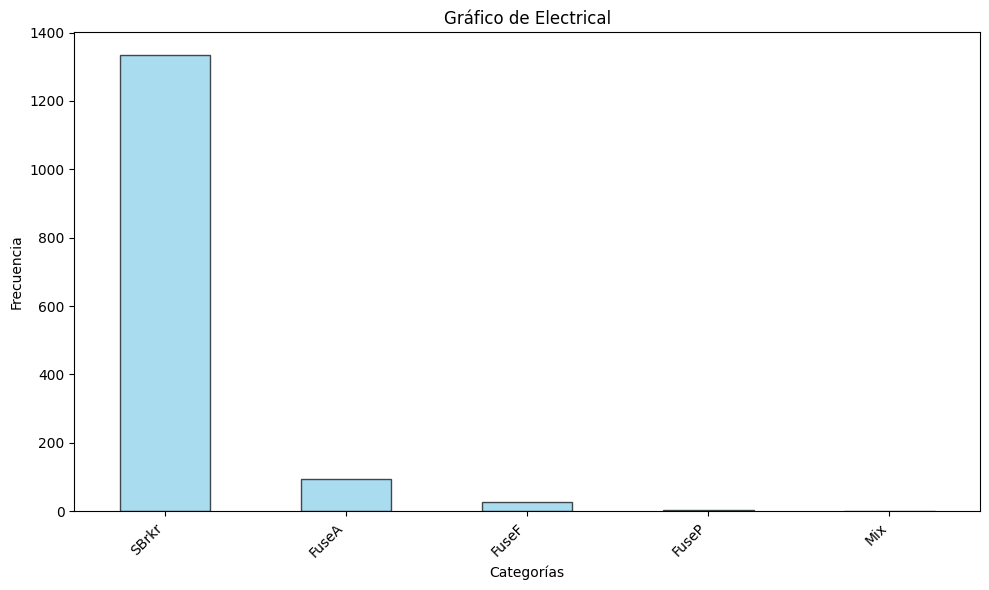



***KitchenQual***


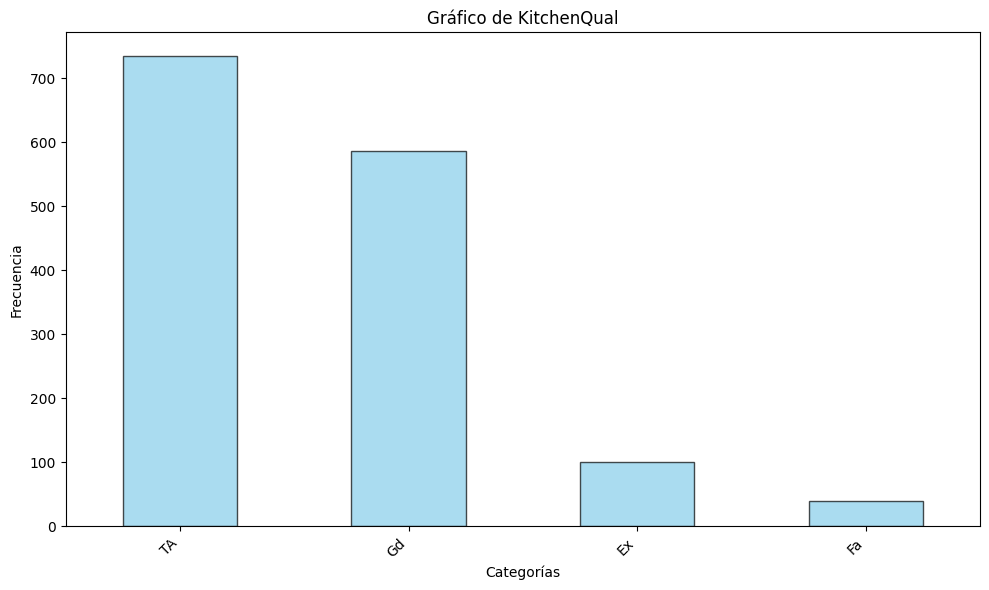



***Functional***


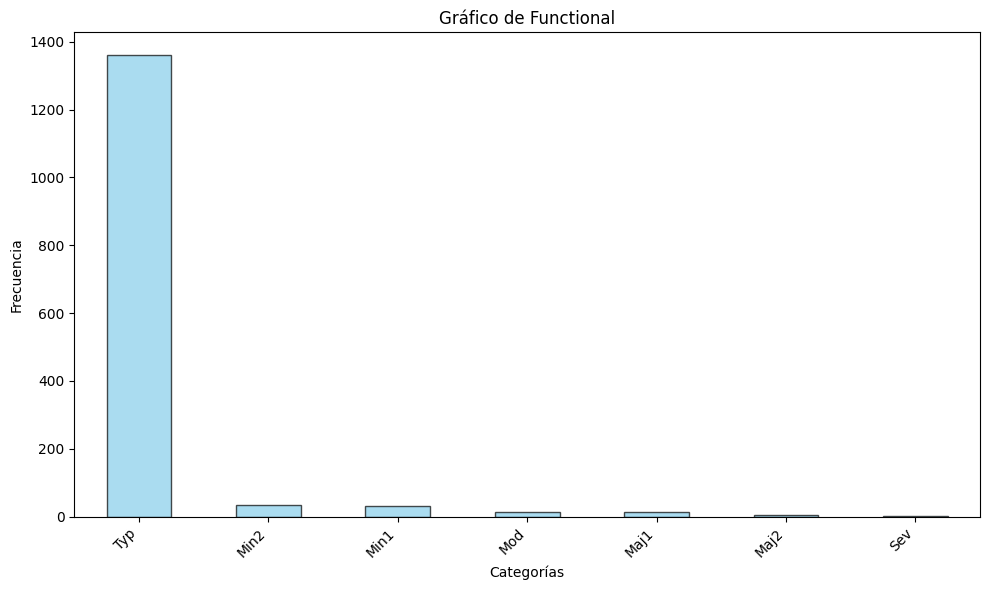



***FireplaceQu***


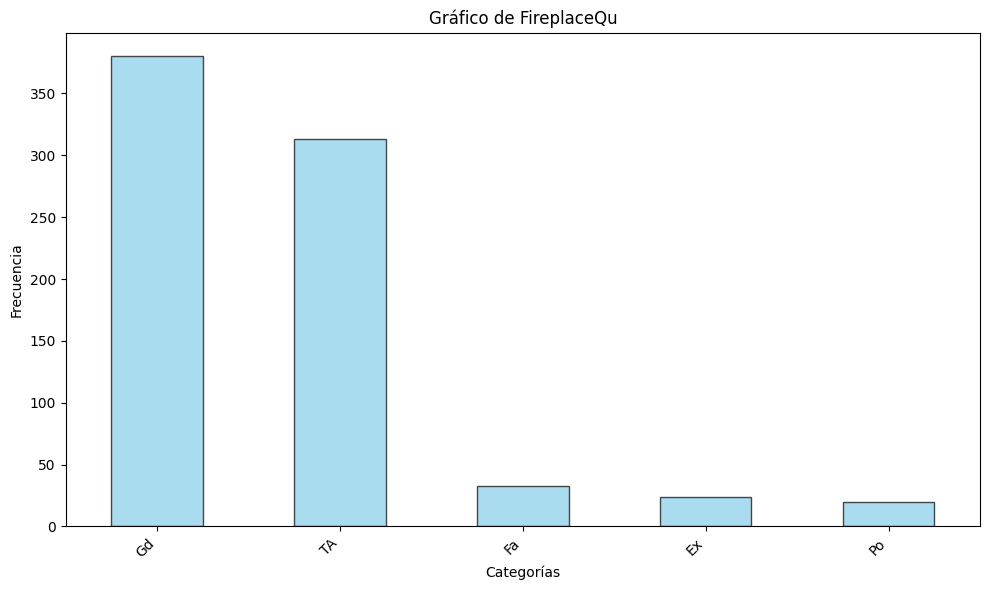



***GarageType***


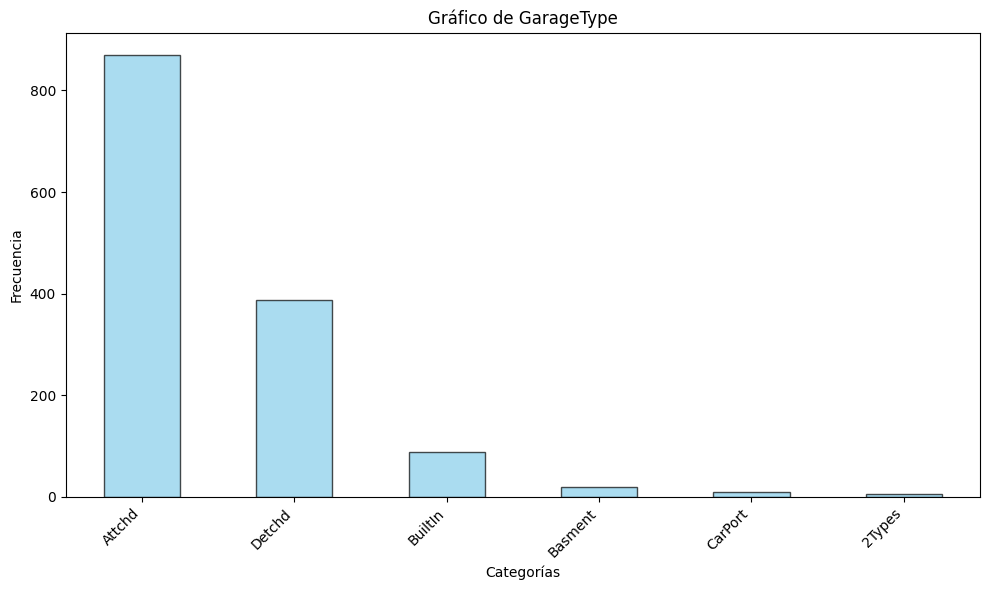



***GarageFinish***


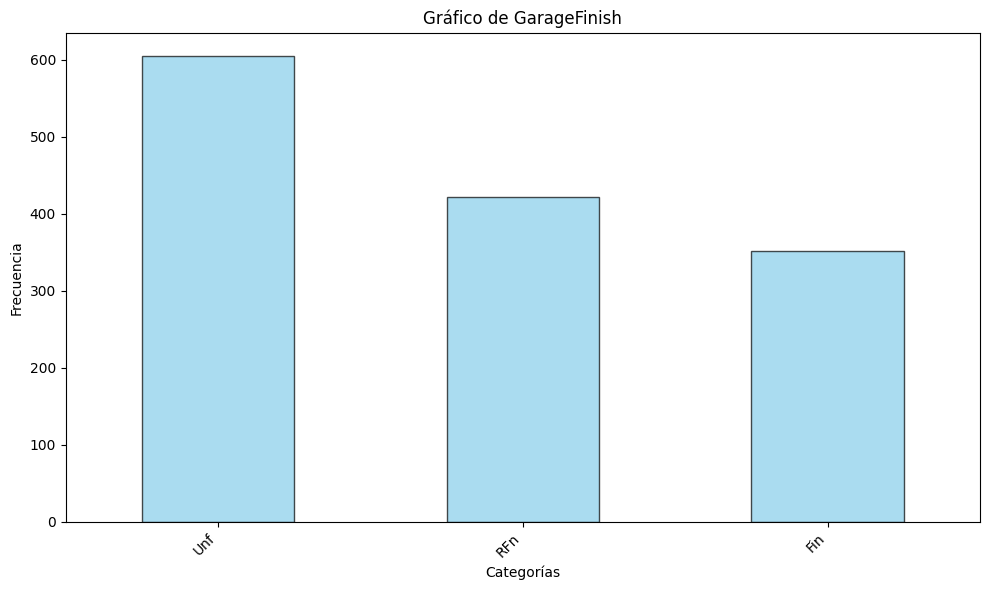



***GarageQual***


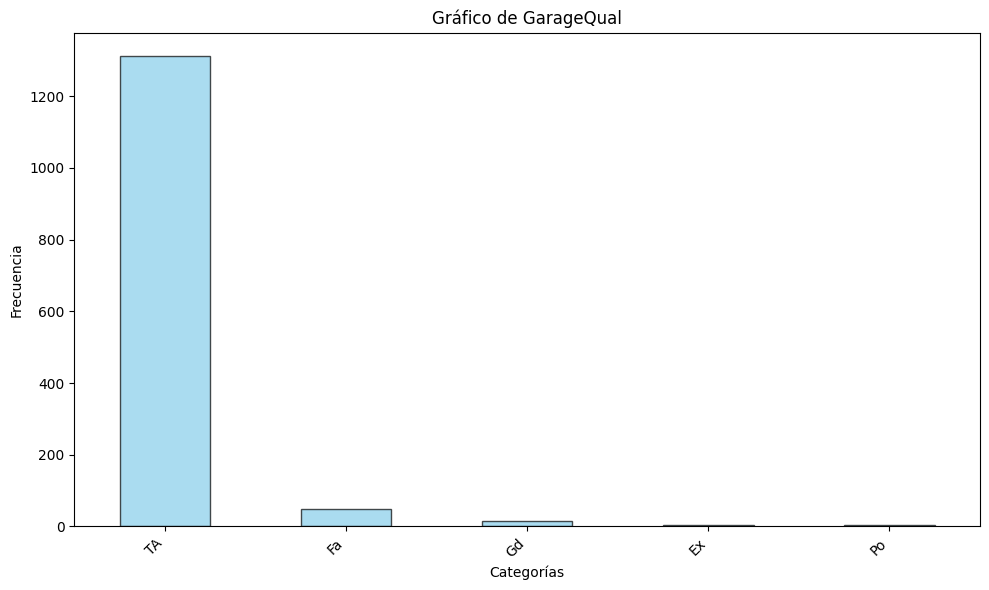



***GarageCond***


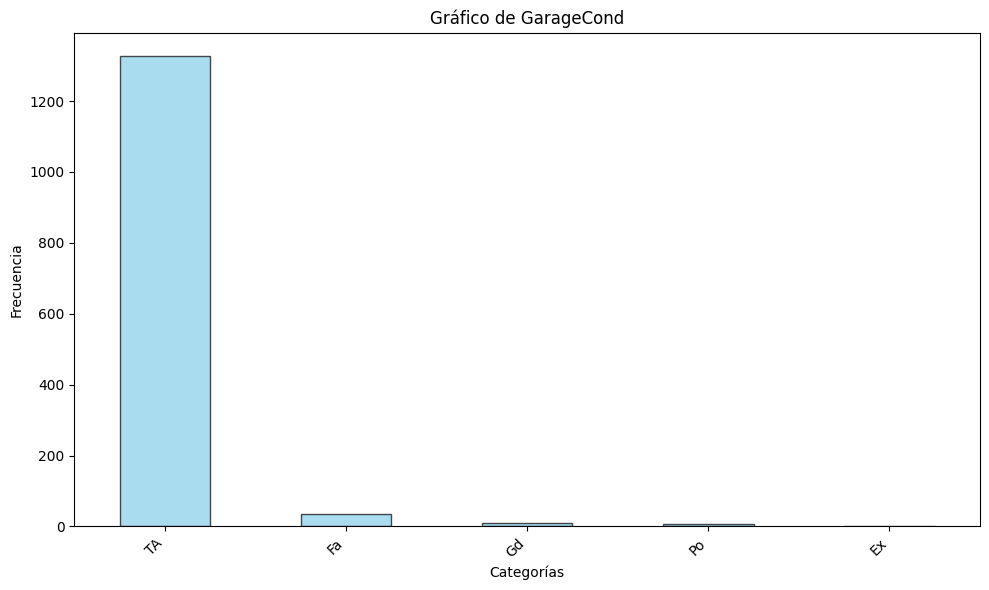



***PavedDrive***


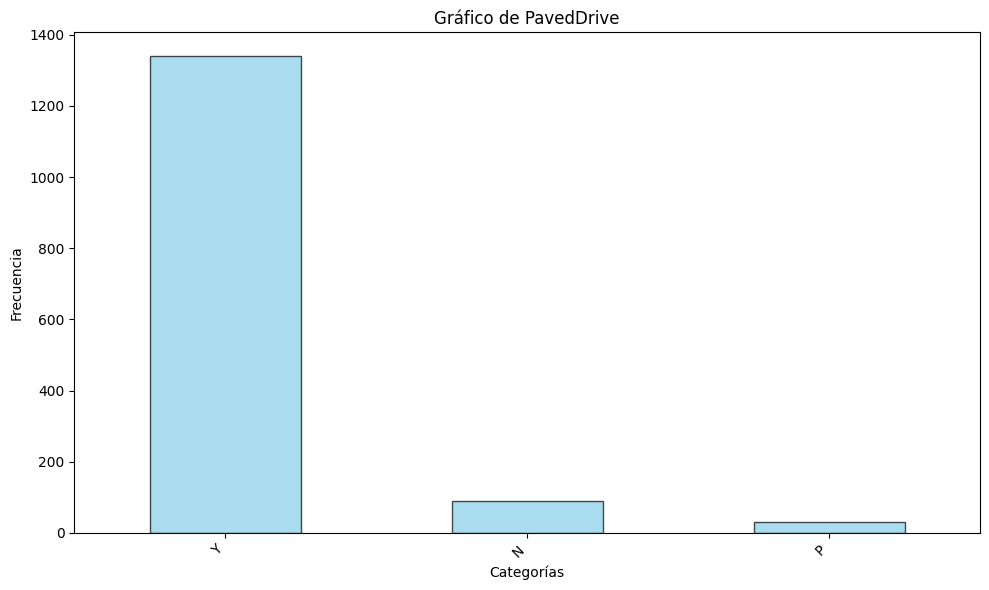



***PoolQC***


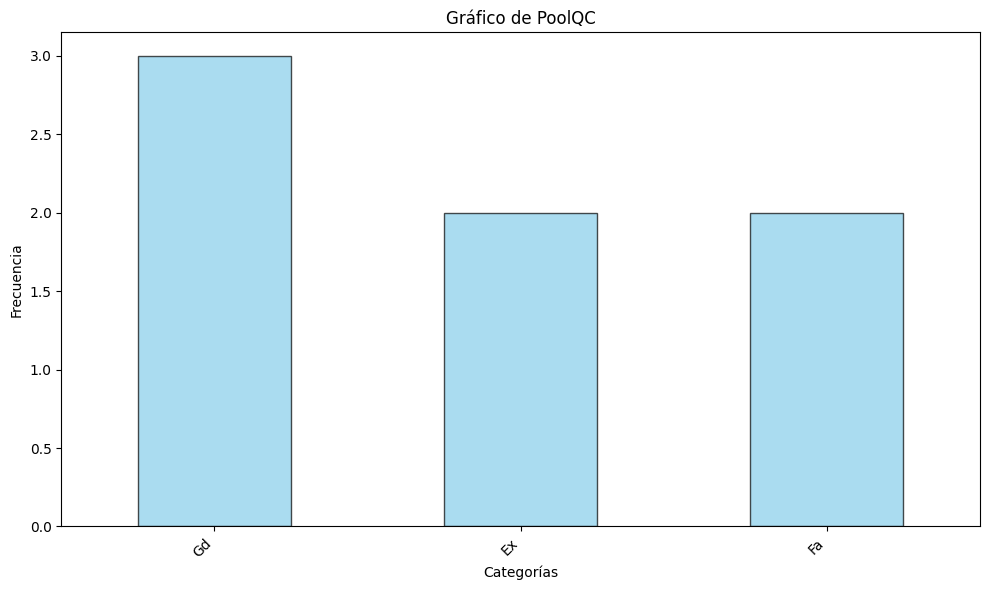



***Fence***


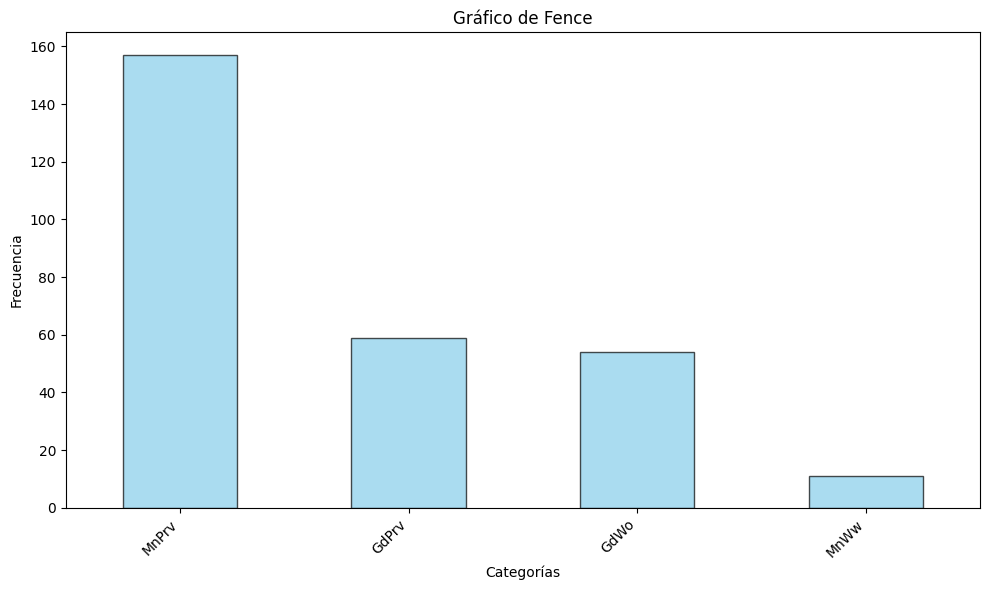



***MiscFeature***


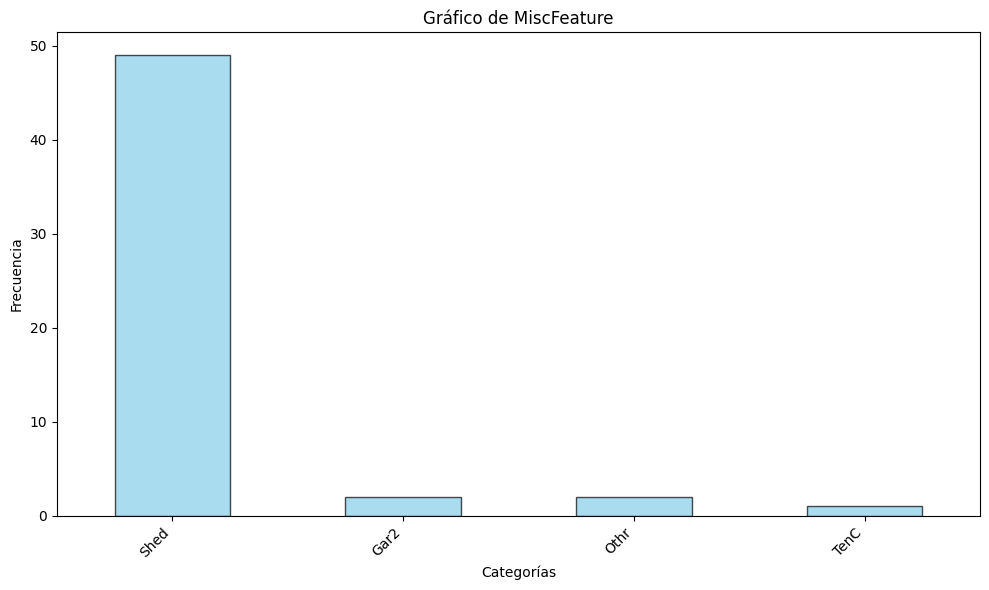



***SaleType***


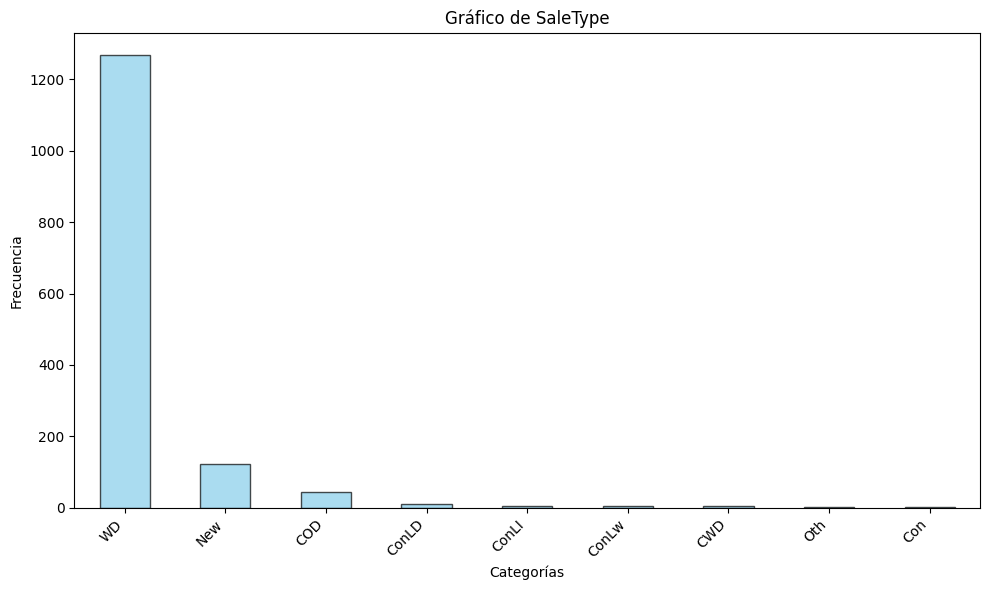



***SaleCondition***


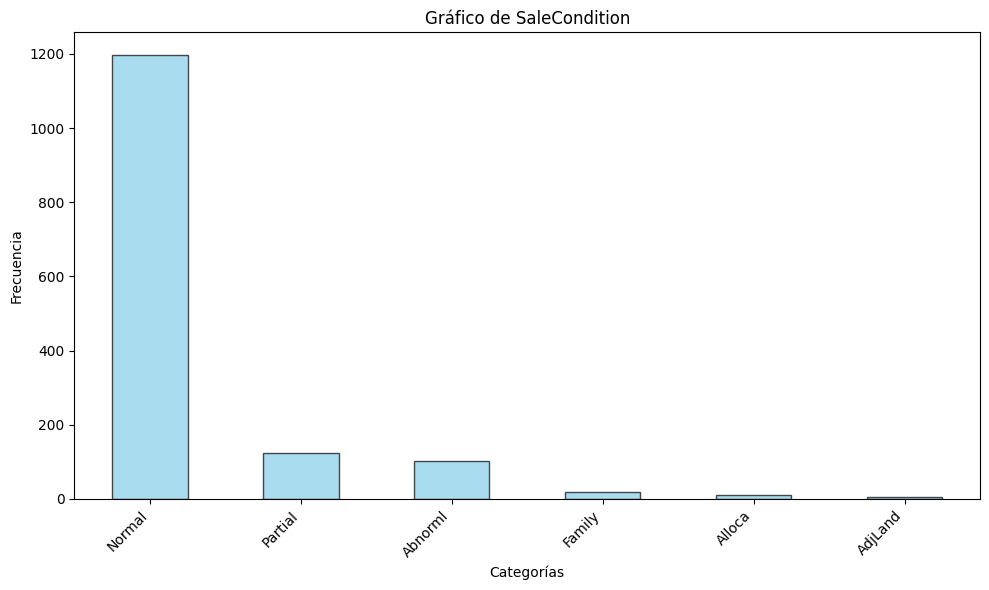



***MSSubClass***


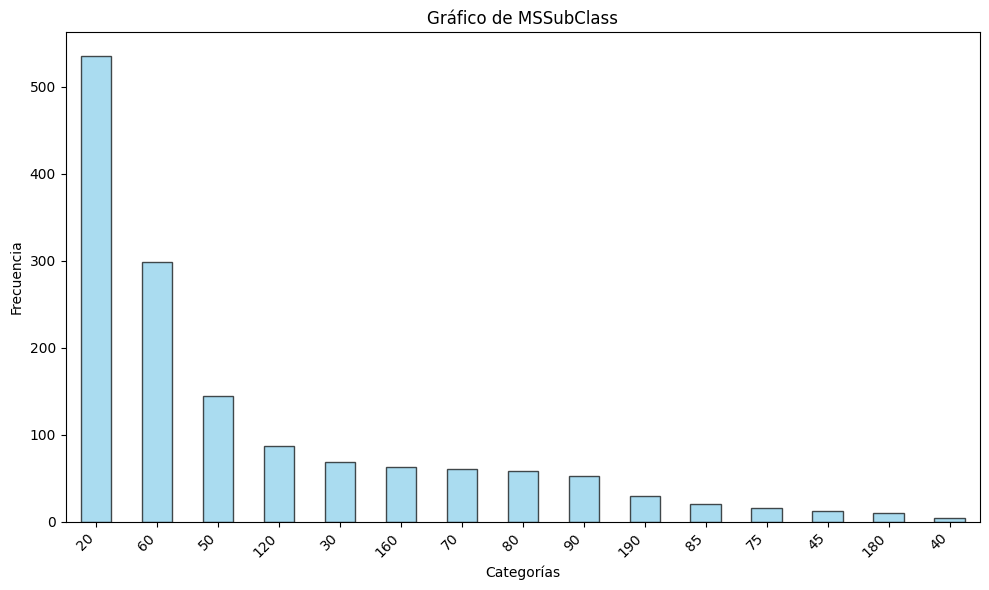



***MoSold***


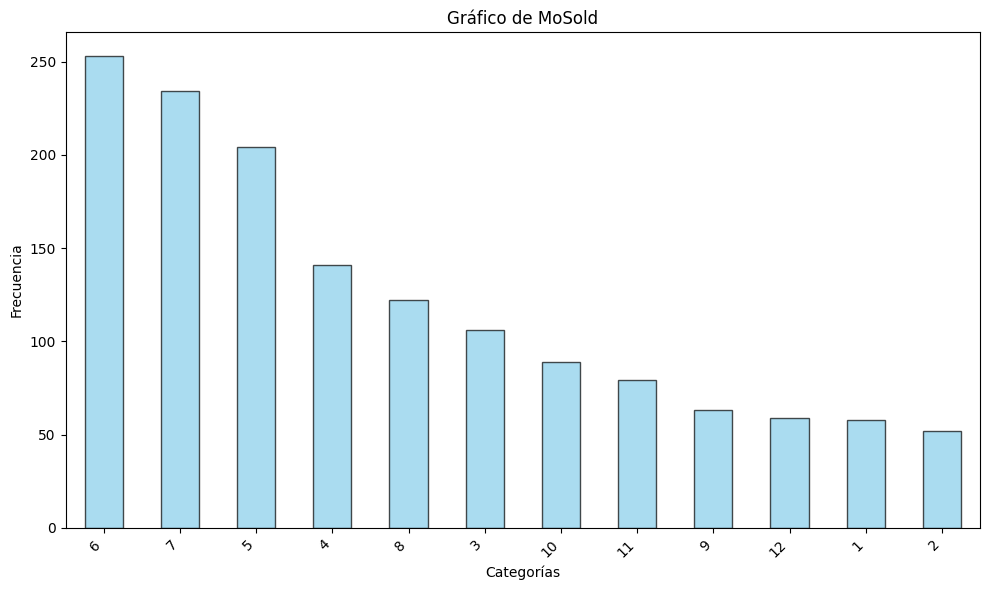

In [ ]:
for col in cualitativas:
    print("***" + col + "***")
    funciones.frecuencias(house_prices[col], col)
    print("\n")